In [52]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [53]:
print(tf.__version__)

2.11.0


In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!ls sample_data

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
!ls


arrhythmia.data  sample_data


In [8]:
!cd arrhythmia.data 

/bin/bash: line 0: cd: arrhythmia.data: Not a directory


In [10]:
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

In [12]:
import pandas as pd
df=pd.read_csv('/content/arrhythmia.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [16]:
data = df [[0,1,2,3,4,5]]
data.columns= ['age','sex' ,'height', 'weight', 'QRS duration','P-R interval']
data

,age,sex,height,weight,QRS duration,P-R interval
0,75,0,190,80,91,193
1,56,1,165,64,81,174
2,54,0,172,95,138,163
3,55,0,175,94,100,202
4,75,0,190,80,88,181
...,...,...,...,...,...,...
447,53,1,160,70,80,199
448,37,0,190,85,100,137
449,36,0,166,68,108,176
450,32,1,155,55,93,106


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51dd0d1ac0>,
      dtype=object)

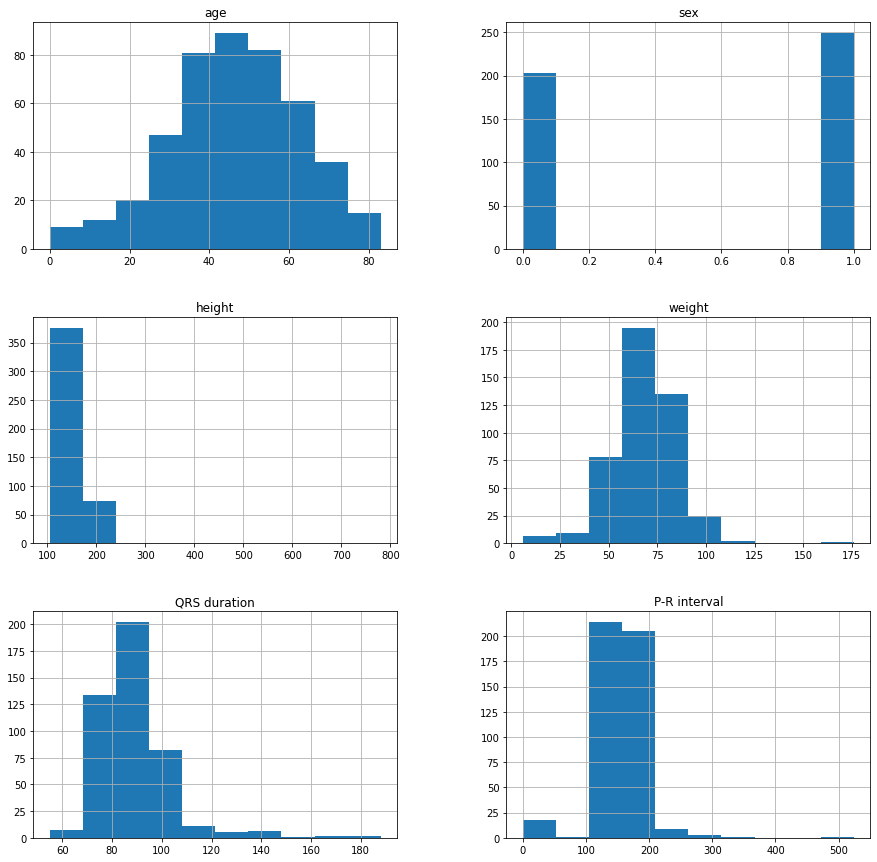

In [17]:
plt.rcParams['figure.figsize']=[15,15]
data.hist()

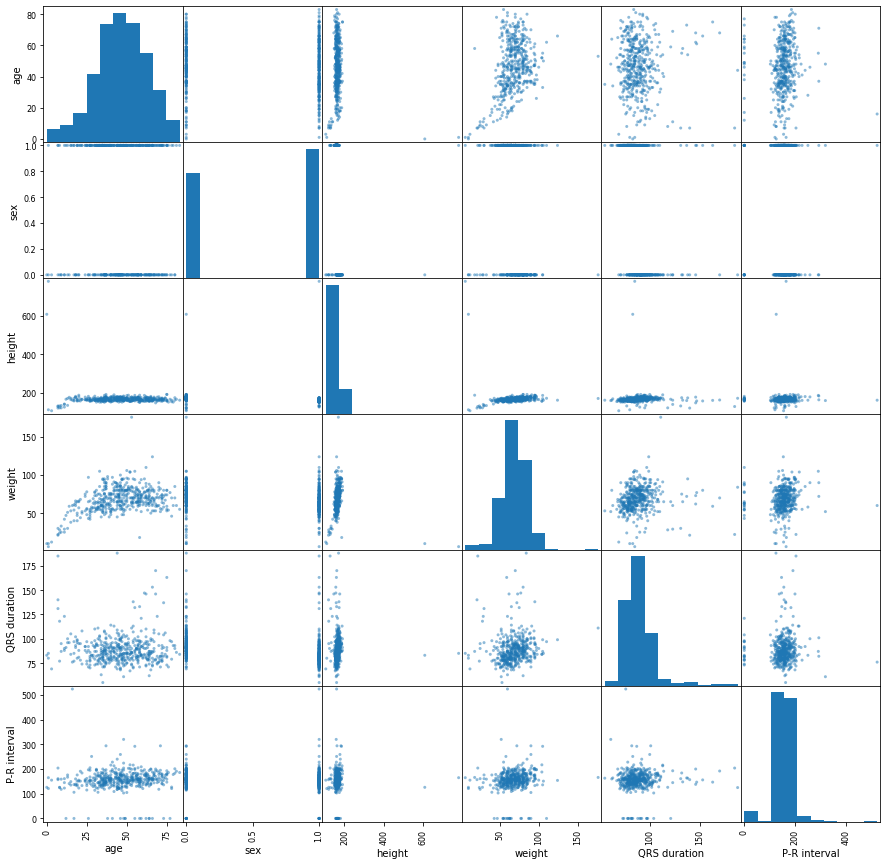

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [3]:
url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
tf.keras.utils.get_file('auto-mpg.data',url)

'C:\\Users\\asus\\.keras\\datasets\\auto-mpg.data'

In [4]:
import pandas as pd
df=pd.read_csv(r'C:/Users/asus/.keras/datasets/auto-mpg.data',header=None,delim_whitespace=True)
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [54]:
from sklearn.datasets import load_breast_cancer
dt=load_breast_cancer()

In [55]:
dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [56]:
dt.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dt.data,dt.target,test_size=.3)
n,d=x_train.shape

In [58]:
n,d

(398, 30)

In [59]:
from sklearn.preprocessing import StandardScaler
a=StandardScaler()
x_train=a.fit_transform(x_train)
x_test=a.transform(x_test)

In [60]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(d,),activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,verbose=2)

Epoch 1/100
13/13 - 0s - loss: 0.8154 - accuracy: 0.4095 - val_loss: 0.8233 - val_accuracy: 0.3626 - 455ms/epoch - 35ms/step
Epoch 2/100
13/13 - 0s - loss: 0.7291 - accuracy: 0.4849 - val_loss: 0.7424 - val_accuracy: 0.4737 - 39ms/epoch - 3ms/step
Epoch 3/100
13/13 - 0s - loss: 0.6571 - accuracy: 0.5779 - val_loss: 0.6736 - val_accuracy: 0.5848 - 44ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 0.5966 - accuracy: 0.6859 - val_loss: 0.6165 - val_accuracy: 0.6667 - 46ms/epoch - 4ms/step
Epoch 5/100
13/13 - 0s - loss: 0.5454 - accuracy: 0.7563 - val_loss: 0.5694 - val_accuracy: 0.7135 - 44ms/epoch - 3ms/step
Epoch 6/100
13/13 - 0s - loss: 0.5033 - accuracy: 0.7940 - val_loss: 0.5297 - val_accuracy: 0.7544 - 44ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 0.4669 - accuracy: 0.8342 - val_loss: 0.4960 - val_accuracy: 0.7895 - 42ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 0.4358 - accuracy: 0.8543 - val_loss: 0.4674 - val_accuracy: 0.8129 - 47ms/epoch - 4ms/step
Epoch 9/100
13

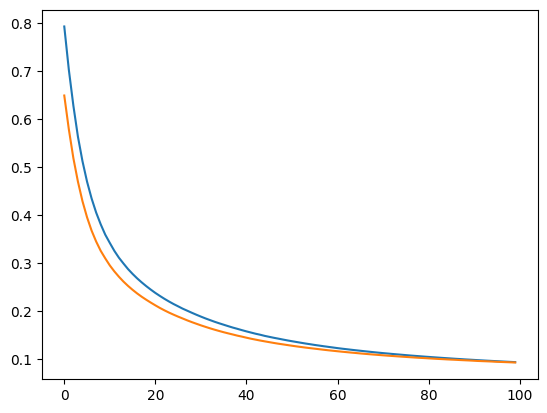

In [14]:

plt.plot(history.history['loss'], label='loss') 
plt.plot(history.history['val_loss'], label='val loss') 


In [62]:
predection=model.predict(x_test)
predection

6/6 [==============================] - 0s 996us/step


array([[9.97820854e-01],
       [3.09414696e-04],
       [9.97881234e-01],
       [9.80401814e-01],
       [1.32072729e-03],
       [9.74584997e-01],
       [5.09507835e-01],
       [8.84906292e-01],
       [3.80555354e-03],
       [9.78267610e-01],
       [6.79386795e-01],
       [2.24125361e-05],
       [4.89874631e-02],
       [8.23830247e-01],
       [9.70704973e-01],
       [9.63006794e-01],
       [6.34329841e-02],
       [3.45149159e-01],
       [9.97426808e-01],
       [9.28777337e-01],
       [9.85629439e-01],
       [2.71232864e-07],
       [9.68638122e-01],
       [9.93901312e-01],
       [6.50017662e-03],
       [9.83583748e-01],
       [3.66246879e-01],
       [9.94181752e-01],
       [2.71450954e-05],
       [9.80405033e-01],
       [9.14070249e-01],
       [9.91906524e-01],
       [9.54074264e-01],
       [9.96784806e-01],
       [9.99427915e-01],
       [7.92020634e-02],
       [5.06284237e-01],
       [6.98575974e-01],
       [9.98501062e-01],
       [4.61852585e-04],


In [65]:
p=np.round(predection).flatten()

In [71]:
model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9708


[0.09847541898488998, 0.9707602262496948]

In [66]:
np.mean(p==y_test)

0.9707602339181286

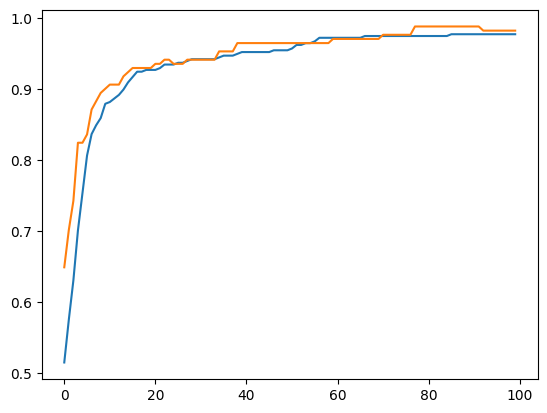

In [16]:

plt.plot(history.history['accuracy'], label='loss') 
plt.plot(history.history['val_accuracy'], label='val loss') 

In [33]:
import pandas as pd
data=pd.read_csv('moore.csv',header=None).values
X=data[:,0].reshape(-1,1)
Y=data[:,1]

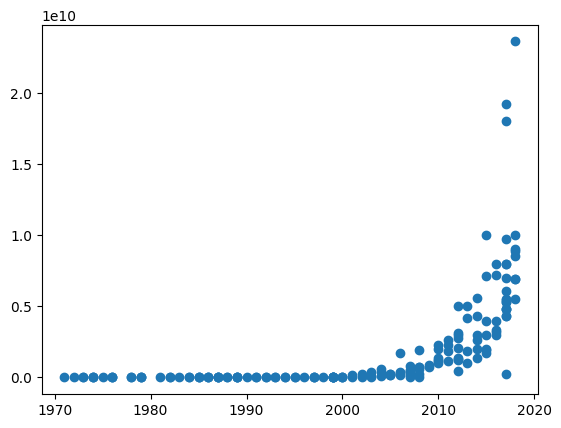

In [34]:
plt.scatter(X,Y)

In [36]:
Y=np.log(Y)

In [39]:
X=X-X.mean()

In [72]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(1,)))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')
def schedule(epoch,lr):
    if epoch>=50:
        return 0.0001
    return 0.001
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule) 
# schedule a learning rate by function we defined
r=model.fit(X,Y,epochs=200,callbacks=[scheduler])


Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 344.2915 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 327.1314 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 993us/step - loss: 266.8537 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 193.4069 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 996us/step - loss: 211.0376 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 132.1209 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 107.5021 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 67.8150 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 47.1349 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 38.6927 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - lo

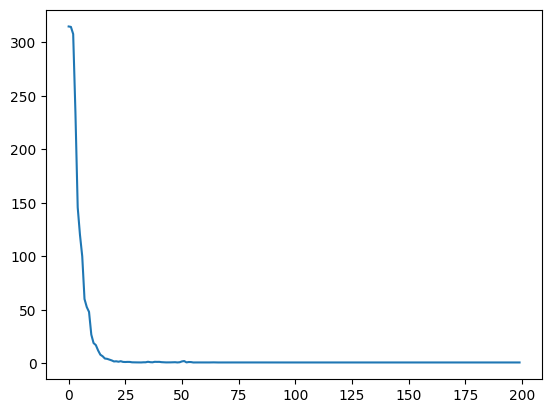

In [41]:
plt.plot(r.history['loss'],label='loss')

In [48]:
X

array([[-31.19753086],
       [-30.19753086],
       [-29.19753086],
       [-29.19753086],
       [-28.19753086],
       [-28.19753086],
       [-28.19753086],
       [-27.19753086],
       [-26.19753086],
       [-26.19753086],
       [-26.19753086],
       [-24.19753086],
       [-24.19753086],
       [-23.19753086],
       [-23.19753086],
       [-23.19753086],
       [-21.19753086],
       [-20.19753086],
       [-20.19753086],
       [-19.19753086],
       [-18.19753086],
       [-18.19753086],
       [-17.19753086],
       [-17.19753086],
       [-17.19753086],
       [-16.19753086],
       [-16.19753086],
       [-16.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-15.19753086],
       [-14.19753086],
       [-14.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-13.19753086],
       [-12.19753086],
       [-11.19753086],
       [-11.19753086],
       [-10.19753086],
       [-10.19753086],
       [ -9

6/6 [==============================] - 0s 1ms/step


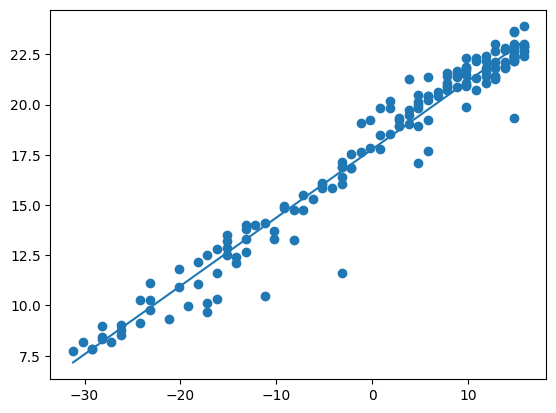

In [73]:
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [76]:
w, b =model.layers[0].get_weights() 
X=X.reshape(-1, 1) 
Yhat2 =(X.dot(w) + b).flatten() 
np.allclose(Yhat, Yhat2) 


0.0